<a href="https://colab.research.google.com/github/Neelov12/MAT-422/blob/main/1_4_Neelov_Alam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4 Principal Component Analysis

# Contents:

> 1.4.1: Singular Value Decomposition

> 1.4.2: Low-Rank Matrix Approximations

> 1.4.3: Principal Component Analysis


# 1.4.1: Singular Value Decomposition

In this section, I will demonstrate Singular Value Demposition, which states that

> Let $A$ be an $m × n$ matrix
with the dimension of col($A$) = $r$. Then there exists an $m × n$ matrix ∑, where
the diagonal entries in D are the first r singular values of $A
σ1 ≥
σ2 ≥ · · · ≥
σr ≥ 0$, and there exist an $m × m$ orthogonal matrix $U$ and an $n × n$ orthogonal
matrix $V$ such that
>
> $A = U ∑V^T$

using the following example:

> We will be finding the SVD of $A$, such that
>
>$A_{m,n} =
 \begin{pmatrix}
  2 & 2 \\
  2 & 6 \\
  4 & 1 \\
  9 & 3 \\
  4 & 8 \\
 \end{pmatrix}$
 >
 > and,
 >
 > $A = U ∑V^T$

To do this, we must implement the following steps:

1. Find $W$ = $A^TA$
2. Find the eignevalues and eigenvectors of $W$
3. Square-root the non-zero eigenvalues of $W$ to find $∑$
4. Orthonormalize the eigenvectors using $Gram-Schmidt$ to find $U$
5. Find $V$

The tensorflow function linal.svd allows us to this very simply:

In [1]:
import tensorflow as tf

In [5]:
matrix_A = tf.constant([[2, 2], [2, 6], [4, 1], [9, 3], [4, 8]], dtype=tf.float32)
print("Matrix A: \n{}\n".format(matrix_A))

d, u, v = tf.linalg.svd(matrix_A, full_matrices=True, compute_uv=True)
print("Diagonal E: \n{} \n\nMatrix U: \n{} \n\nMatrix V^T: \n{}".format(d, u, v))

Matrix A: 
[[2. 2.]
 [2. 6.]
 [4. 1.]
 [9. 3.]
 [4. 8.]]

Diagonal E: 
[14.020611   6.1985893] 

Matrix U: 
[[ 0.20168404  0.0101005  -0.37736756 -0.8434346  -0.324705  ]
 [ 0.3989028   0.47639114  0.17295702  0.2950933  -0.70493555]
 [ 0.25545424 -0.3295169   0.85012364 -0.32161167 -0.00418203]
 [ 0.61175054 -0.6539835  -0.32334778  0.30188912 -0.04874577]
 [ 0.6005869   0.48649156 -0.02038588 -0.08346832  0.6286803 ]] 

Matrix V^T: 
[[ 0.72258574 -0.6912813 ]
 [ 0.6912813   0.72258574]]


Behold, $A = U ∑V^T$, such that
> $U =
 \begin{pmatrix}
 0.20168404 & 0.0101005 & -0.37736756 & -0.8434346 & -0.324705  \\
 0.3989028 &  0.47639114 & 0.17295702 & 0.2950933 & -0.70493555 \\
 0.25545424 & -0.3295169 &  0.85012364 & -0.32161167 & -0.00418203 \\
 0.61175054 & -0.6539835 & -0.32334778 & 0.30188912 & -0.04874577 \\
 0.6005869 &  0.48649156 & -0.02038588 & -0.08346832 & 0.6286803 \\
 \end{pmatrix} $
 >
 > $∑ =
 \begin{pmatrix}
  14.020611 & 0 \\
  0 & 6.1985893 \\
  0 & 0 \\
  0 & 0 \\
  0 & 0 \\
 \end{pmatrix}$
 >
 > $V^T =
 \begin{pmatrix}
  0.72258574 & -0.6912813 \\
  0.6912813 & 0.72258574 \\
  \end{pmatrix}$

# 1.4.2: Low-Rank Matrix Approximations

In this section, I will demonstrate a low-rank matrix approximation using the same matrix $A$
>$A =
 \begin{pmatrix}
  2 & 2 \\
  2 & 6 \\
  4 & 1 \\
  9 & 3 \\
  4 & 8 \\
 \end{pmatrix}$

in the previous example to show that

> $A = \sum_{j=1}^k σ_ju_jv_j^T$

To do this, I will be performing this operation from $j = {1, 2, 3, 4, 5}$ such that $σ1 ≥
σ2 ≥ · · ·
σr > 0$

In [1]:
import tensorflow as tf

In [2]:
# j = 1

sum = tf.zeros([5,2], name="A")

u_1 = tf.constant([[0.20168404],
                   [ 0.3989028],
                   [ 0.25545424],
                   [ 0.61175054],
                   [ 0.6005869]],
                   dtype=tf.float32)

v_t_1 = tf.constant([[0.72258574, -0.6912813]],
                     dtype=tf.float32)

sig_1 = 14.020611

uv1 = tf.matmul(u_1, v_t_1)
suv1 = tf.scalar_mul(sig_1, uv1)
sum = suv1

# j = 2


u_2 = tf.constant([[0.0101005],
                   [0.47639114],
                   [-0.3295169],
                   [-0.6539835],
                   [0.48649156]],
                   dtype=tf.float32)

v_t_2 = tf.constant([[0.6912813, 0.72258574]],
                     dtype=tf.float32)

sig_2 = 6.1985893

uv2 = tf.matmul(u_2, v_t_2)
suv2 = tf.scalar_mul(sig_2, uv2)
sum += suv2

print(sum)

tf.Tensor(
[[ 2.0865602 -1.909519 ]
 [ 6.082643  -1.7324786]
 [ 1.1760612 -3.9518201]
 [ 3.395403  -8.8584   ]
 [ 8.169203  -3.6419985]], shape=(5, 2), dtype=float32)


As you can see, with adjustment, this is a rough approximation of the original matrix $A$

>$A =
 \begin{pmatrix}
  2 & 2 \\
  2 & 6 \\
  4 & 1 \\
  9 & 3 \\
  4 & 8 \\
 \end{pmatrix} $
>
>$A_{approximation} =
 \begin{pmatrix}
   1.909519 & 2.0865602 \\
   1.7324786 & 6.082643  \\
   3.9518201 & 1.1760612 \\
   8.8584 & 3.395403 \\
   3.6419985 & 8.169203  \\
 \end{pmatrix}$

# 1.4.3: Principal Component Analysis

In this section, I will demonstrate Principal Component Analysis (PCA) using a randomized $50 x 50$ matrix

First, we must import tensorflow and pyplot to simplify this task

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

Then, create x and y data

In [38]:
x_data = tf.multiply(4, tf.random.uniform([50], minval=0, maxval=50, dtype = tf.float32, seed = 0))
y_data = tf.multiply(-3, x_data) + 1 + tf.random.uniform([50], minval=0, maxval=50, dtype = tf.float32, seed = 0)

Then, plot the data

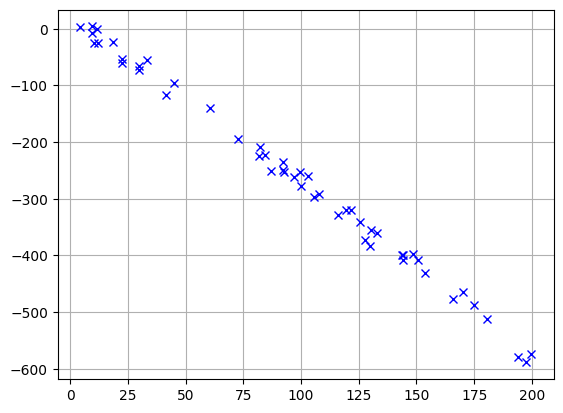

In [39]:
X = tf.stack([x_data, y_data], axis=1)
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'})
plt.plot(X[:,0], X[:,1], 'x', color='b')
plt.grid()

We must now standardize the data

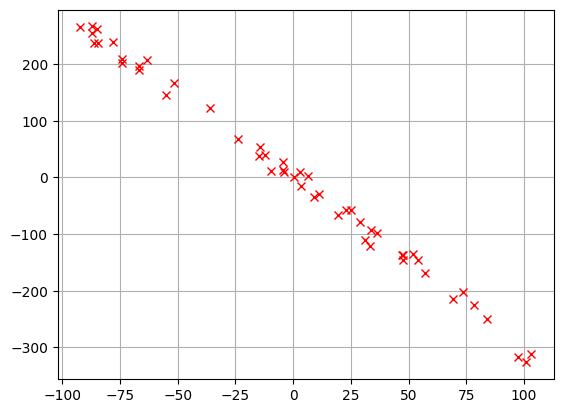

In [40]:
# Standardize function
def normalize(data):
    X = tf.identity(data)
    X -=tf.reduce_mean(data, axis=0)
    return X

normalized_data = normalize(X)
plt.plot(normalized_data[:,0], normalized_data[:,1], 'x', color='r')
plt.grid()

Then, find plot the transformed data

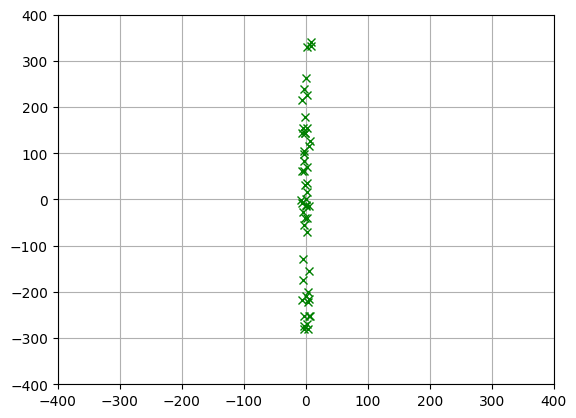

In [43]:
# Finding eigen values and vectors
e_values, e_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(normalized_data), normalized_data, axes=1))

X_new = tf.tensordot(tf.transpose(e_vectors), tf.transpose(normalized_data), axes=1)

plt.plot(X_new[0, :], X_new[1, :], 'x', color='g')
plt.xlim(-400, 400)
plt.ylim(-400, 400)
plt.grid()

We have successfully transformed the data in accordance with PCA